In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import cv2
import math
import tensorflow as tf

In [2]:
# height and width of images
img_width,img_height = 150,150  
#increasing these variables increases quality and size of image
dim = (img_width, img_height)

# location of locally saved dataset
loc= "E:/Code data/Signatures/Dataset_Signature_Final/Dataset/"

# helper function to return black and white image ndarray on giving location
def returnimages(path,img):
    image=cv2.imread(path+"/"+ img)                  #bringing the image
    image=cv2.resize(image, (img_width, img_height))
    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image/255
    return image

def flatten(img):return img.reshape((img.size, 1))   # flatten numpy array of floats to 1d 

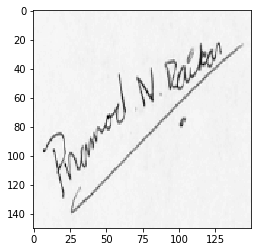

In [3]:
testimage = returnimages(loc+'dataset1/forge',"02100002.png")
plt.imshow(testimage,'gray')

In [4]:
# real signatures 1d array
real_sign = np.ndarray((210,img_width*img_height,1))
forged_sign = np.ndarray((210,img_width*img_height,1))
count_real =0
count_forged = 0
# importing 60 real signatures from dataset1
for i in range(1,13):
    for j in range(0,5):
        fird = str(i)
        if len(fird)== 1: fird='0'+fird
        temp_img = returnimages(loc+'dataset1/real','0'+fird+'0'+str(j)+'0'+fird+'.png')
        real_sign[count_real] = flatten(temp_img)
        count_real+=1
        #plt.imshow(temp_img,'gray')
        #plt.show()

# importing 60 forged signatures from dataset1
for i in range(1,13):
    for j in range(0,5):
        fird = '0210'+str(j)
        lastd = str(i)
        if len(lastd)== 1: lastd='0'+lastd
        temp_img = returnimages(loc+'dataset1/forge',fird+'0'+lastd+'.png')
        forged_sign[count_forged] = flatten(temp_img)
        count_forged+=1
        #plt.imshow(temp_img,'gray')
        #plt.show()

# importing 150 real signatures from dataset2
for i in range(1,31):
    for j in range(1,6):
        fird = str(i)
        if len(fird)== 1: fird='0'+fird
        temp_img = returnimages(loc+'dataset3/real','0'+fird+'0'+str(j)+'0'+fird+'.png')
        real_sign[count_real] = flatten(temp_img)
        count_real+=1


In [5]:
real_sign[59]

array([[0.97254902],
       [0.97254902],
       [0.97254902],
       ...,
       [0.97647059],
       [0.97647059],
       [0.97647059]])

In [6]:
input_var = np.ndarray((1341,2*img_width*img_height))
output_var = np.zeros((1341,1))
output_var[0:252]=1

In [7]:
def findsubs1(x): # set of elements of i to i+5
    lis = []
    for i in range(x,x+6):
        for j in range(i+1,x+5):
            lis.append([i,j])
    return lis

def findsubs2(x): # set of elements of i,i+5...
    lis = []
    for i in range(x,210,5):
        for j in range(i+5,210,5):
            lis.append([i,j])
    return lis

In [8]:
counter = 0
for i in range(0,210,5):
    tmp = findsubs1(i)
    for j in tmp:
        input_var[counter] = np.append(real_sign[j[0]],real_sign[j[1]])
        counter+=1
temp = findsubs2(0)

for i in temp: # real - other real
    input_var[counter] = np.append(real_sign[i[0]],real_sign[i[1]])
    counter+=1
    
for i in range(0,60): # real - forged
    input_var[counter] = np.append(real_sign[i],forged_sign[i])
    counter+=1

In [9]:
print(len(input_var),len(output_var))

1341 1341


In [11]:
train_X = np.ndarray((1341,300,150,1))
for i in range(0,1341):
    train_X[i] = np.reshape(input_var[i],(300,150,1))

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300,150,1)),
  tf.keras.layers.MaxPooling2D(3, 3),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
 #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(800, activation='relu'),
  
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 21, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 10, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3680)              0

In [13]:
model.fit(train_X, output_var,validation_split=0.2, epochs=15)

Train on 1072 samples, validate on 269 samples
Epoch 1/15
1072/1072 [==============================] - 16s 15ms/sample - loss: 0.5761 - accuracy: 0.7649 - val_loss: 0.2325 - val_accuracy: 1.0000
Epoch 2/15
1072/1072 [==============================] - 19s 18ms/sample - loss: 0.5592 - accuracy: 0.7649 - val_loss: 0.2186 - val_accuracy: 1.0000
Epoch 3/15
1072/1072 [==============================] - 22s 21ms/sample - loss: 0.5257 - accuracy: 0.7752 - val_loss: 0.1606 - val_accuracy: 1.0000
Epoch 4/15
1072/1072 [==============================] - 23s 21ms/sample - loss: 0.4199 - accuracy: 0.8125 - val_loss: 0.1685 - val_accuracy: 1.0000
Epoch 5/15
1072/1072 [==============================] - 23s 21ms/sample - loss: 0.3577 - accuracy: 0.8349 - val_loss: 0.6784 - val_accuracy: 0.6580
Epoch 6/15
1072/1072 [==============================] - 22s 21ms/sample - loss: 0.3953 - accuracy: 0.8144 - val_loss: 0.3366 - val_accuracy: 0.9926
Epoch 7/15
1072/1072 [==============================] - 23s 21ms/